In [136]:
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
# only need to do once
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('stopwords')


import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /home/sfirestone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sfirestone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/sfirestone/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sfirestone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing our Data

Description about data here.

In [9]:
# import the US-based youtube dataset
df = pd.read_csv('USvideos.csv')

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [10]:
columns_to_drop = ['video_id', 'trending_date', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'comment_count']
df.drop(columns_to_drop, inplace=True, axis=1)

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...


In [4]:
df.isnull().sum()

title              0
channel_title      0
category_id        0
publish_time       0
tags               0
views              0
likes              0
dislikes           0
description      570
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          40949 non-null  object
 1   channel_title  40949 non-null  object
 2   category_id    40949 non-null  int64 
 3   publish_time   40949 non-null  object
 4   tags           40949 non-null  object
 5   views          40949 non-null  int64 
 6   likes          40949 non-null  int64 
 7   dislikes       40949 non-null  int64 
 8   description    40379 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


## Creating our target variable (`is_popular`)

For this analysis, we will be creating our own target variable called `is_popular`. To calculate whether or not a video is popular, YouTube uses an engagement score formula that takes in account of all the different ways a user can interact with a video. This can include liking or disliking a video, commenting or sharing a video, but because there are videos that have comments disabled, we will focus on likes and dislikes for our analysis. Thus, we will be using the following formula to calculate our own engagement score:

$$
\begin{align}
\text{Engagement Score} = \frac{\text{likes} + \text{dislikes}}{\text{views}}
\end{align}
$$

Before we can calculate our engagement score, we will need to understand and clean our data a bit more. First let's take a look at the distribution of our input variables.

In [50]:
print("Summary Stats on Views")
print(df['views'].describe())
print("\nSummary Stats on Likes")
print(df['likes'].describe())
print("\nSummary Stats on Dislikes")
print(df['dislikes'].describe())

Summary Stats on Views
count       40949.00
mean      2360784.64
std       7394113.76
min           549.00
25%        242329.00
50%        681861.00
75%       1823157.00
max     225211923.00
Name: views, dtype: float64

Summary Stats on Likes
count     40949.00
mean      74266.70
std      228885.34
min           0.00
25%        5424.00
50%       18091.00
75%       55417.00
max     5613827.00
Name: likes, dtype: float64

Summary Stats on Dislikes
count     40949.00
mean       3711.40
std       29029.71
min           0.00
25%         202.00
50%         631.00
75%        1938.00
max     1674420.00
Name: dislikes, dtype: float64


/tmp/ipykernel_14213/1632518833.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # rotate x-axis labels


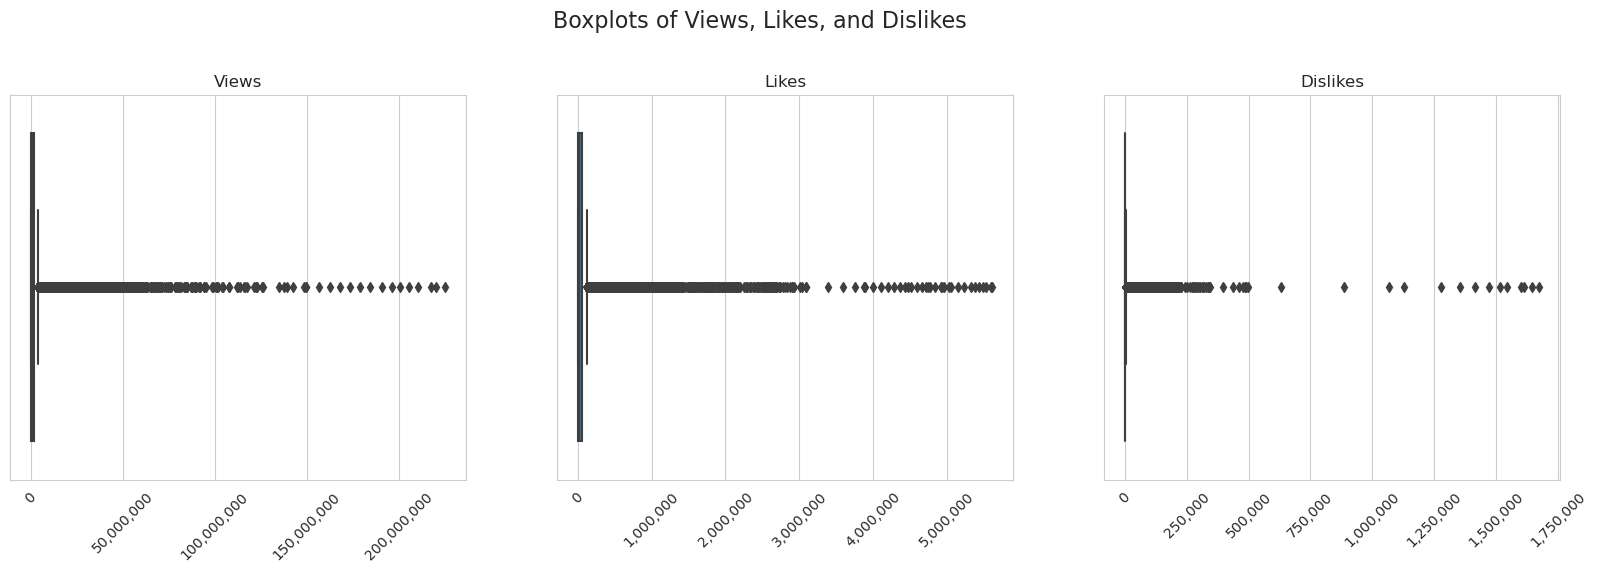

In [51]:
# create boxplots for `views` `likes` `dislikes`
figure, axes = plt.subplots(1, 3, figsize=(20, 5))

# views
sns.boxplot(ax=axes[0], data=df, x='views')
axes[0].set_title('Views')

# likes
sns.boxplot(ax=axes[1], data=df, x='likes')
axes[1].set_title('Likes')

# dislikes
sns.boxplot(ax=axes[2], data=df, x='dislikes')
axes[2].set_title('Dislikes')

for ax in axes:
    ax.ticklabel_format(style='plain', axis='x') # remove scientific notation
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # rotate x-axis labels
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ','))) # add commas to x-axis
    ax.set_xlabel('') # remove x-axis label


figure.suptitle('Boxplots of Views, Likes, and Dislikes', y=1.05, fontsize=16)

plt.show()

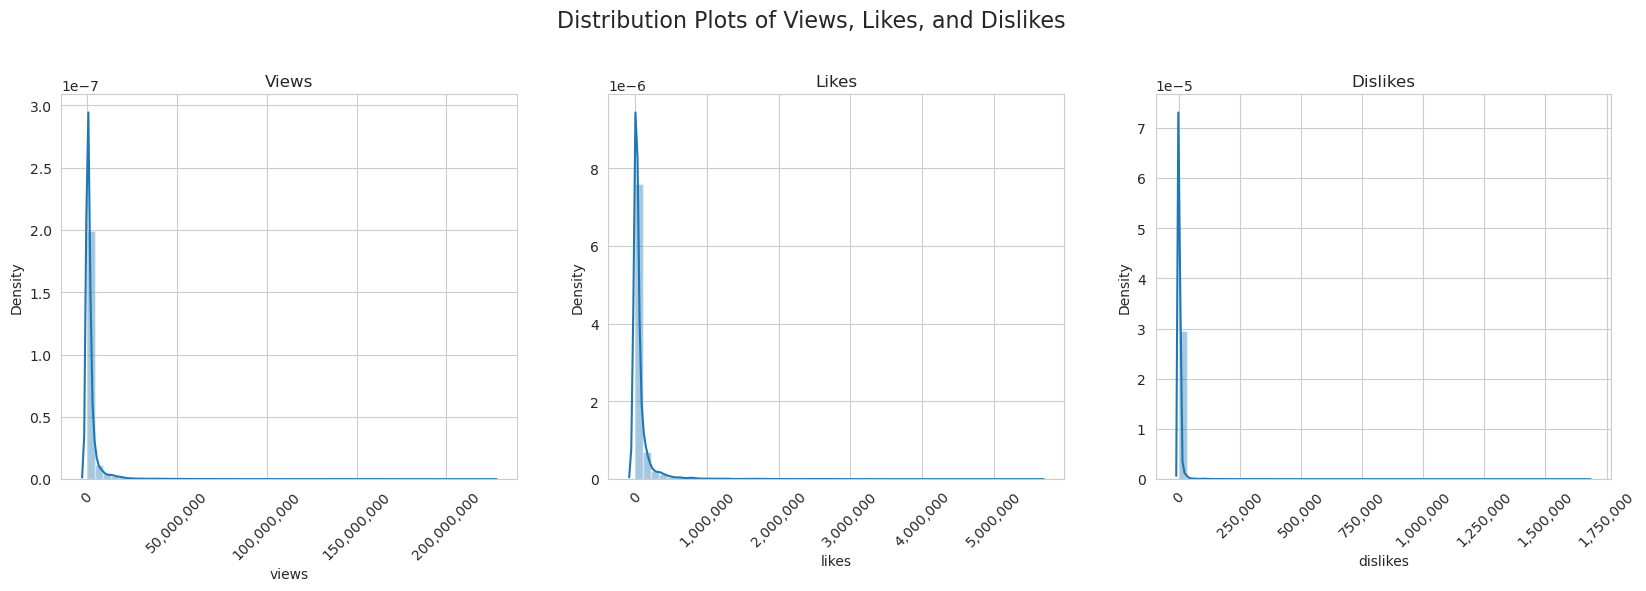

In [54]:
# distribution plot for `views` `likes` `dislikes`
figure, axes = plt.subplots(1, 3, figsize=(20, 5))

# views
sns.distplot(df['views'], ax=axes[0])
axes[0].set_title('Views')

# likes
sns.distplot(df['likes'], ax=axes[1])
axes[1].set_title('Likes')

# dislikes
sns.distplot(df['dislikes'], ax=axes[2])    
axes[2].set_title('Dislikes')

for ax in axes:
    ax.ticklabel_format(style='plain', axis='x') # remove scientific notation
    #ax.ticklabel_format(style='plain', axis='y') # remove scientific notation
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # rotate x-axis labels
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ','))) # add commas to x-axis


figure.suptitle('Distribution Plots of Views, Likes, and Dislikes', y=1.05, fontsize=16)

plt.show()

Based on our description, box-and-whisker, and distribution plot, it appears all of our input variables for our engagement score are highly-skewed right. We can try to normalize our data by taking the log of each variable, but we will still have a lot of outliers. Thus, we will use the median instead of the mean to calculate our engagement score.

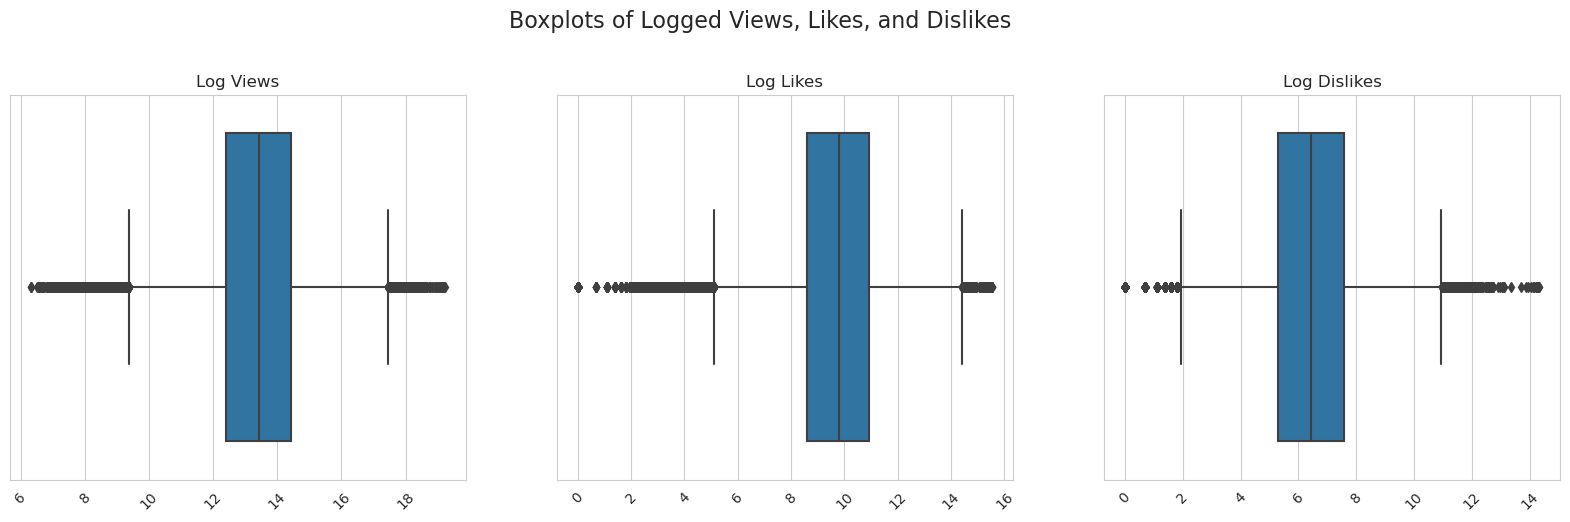

In [56]:
# create log columns for `views` `likes` `dislikes`
df['log_views'] = np.log(df['views'] + 1)
df['log_likes'] = np.log(df['likes'] + 1)
df['log_dislikes'] = np.log(df['dislikes'] + 1)

# create boxplots for `log_views` `log_likes` `log_dislikes`
figure, axes = plt.subplots(1, 3, figsize=(20, 5))

# log_views
sns.boxplot(ax=axes[0], data=df, x='log_views')
axes[0].set_title('Log Views')

# log_likes
sns.boxplot(ax=axes[1], data=df, x='log_likes')
axes[1].set_title('Log Likes')

# log_dislikes
sns.boxplot(ax=axes[2], data=df, x='log_dislikes')
axes[2].set_title('Log Dislikes')

for ax in axes:
    ax.ticklabel_format(style='plain', axis='x') # remove scientific notation
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # rotate x-axis labels
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ','))) # add commas to x-axis
    ax.set_xlabel('') # remove x-axis label

figure.suptitle('Boxplots of Logged Views, Likes, and Dislikes', y=1.05, fontsize=16)

plt.show()

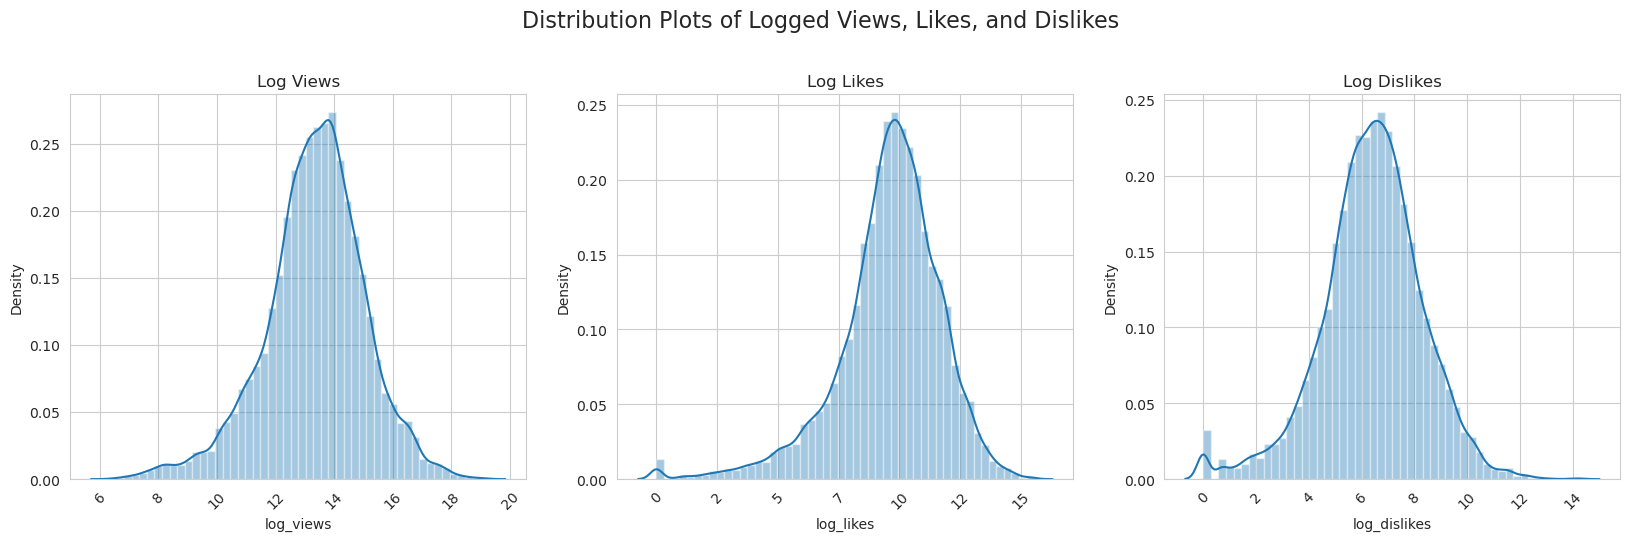

In [60]:
# create distribution plots for `log_views` `log_likes` `log_dislikes`
figure, axes = plt.subplots(1, 3, figsize=(20, 5))

# log_views
sns.distplot(df['log_views'], ax=axes[0])
axes[0].set_title('Log Views')

# log_likes
sns.distplot(df['log_likes'], ax=axes[1])
axes[1].set_title('Log Likes')

# log_dislikes
sns.distplot(df['log_dislikes'], ax=axes[2])
axes[2].set_title('Log Dislikes')

for ax in axes:
    ax.ticklabel_format(style='plain', axis='x') # remove scientific notation
    #ax.ticklabel_format(style='plain', axis='y') # remove scientific notation
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # rotate x-axis labels
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ','))) # add commas to x-axis

figure.suptitle('Distribution Plots of Logged Views, Likes, and Dislikes', y=1.05, fontsize=16)

plt.show()

After log-transformation, the `views`, `likes`, and `dislikes` follow a fairly normal distribution. We can now calculate our engagement score with our log-transformed data and our original data to see how the engagement scores differ.

In [61]:
# create engagement score columns
df['engagement_score_log'] = (df['log_likes'] + df['log_dislikes']) / df['log_views']
df['engagement_score'] = (df['likes'] + df['dislikes']) / df['views']

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,likes_scaled,dislikes_scaled,log_views,log_likes,log_dislikes,engagement_score_log,engagement_score_scaled,engagement_score
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.22,-0.07,-0.03,13.53,10.96,8.00,1.40,0.45,0.08
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John...",0.01,0.10,0.08,14.70,11.48,8.72,1.37,23.46,0.04
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.11,0.31,0.06,14.98,11.89,8.58,1.37,3.29,0.05
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...,-0.27,-0.28,-0.10,12.75,9.23,6.50,1.23,1.41,0.03
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...,-0.04,0.25,-0.06,14.56,11.79,7.60,1.33,-5.41,0.06


In [62]:
# get stats for engagement score
print('Engagement Score Stats')
print(df['engagement_score'].describe())
print('Engagement Score Log Stats')
print(df['engagement_score_log'].describe())

Engagement Score Stats
count   40949.00
mean        0.04
std         0.03
min         0.00
25%         0.02
50%         0.03
75%         0.05
max         0.29
Name: engagement_score, dtype: float64
Engagement Score Log Stats
count   40949.00
mean        1.18
std         0.19
min         0.00
25%         1.12
50%         1.22
75%         1.30
max         1.65
Name: engagement_score_log, dtype: float64


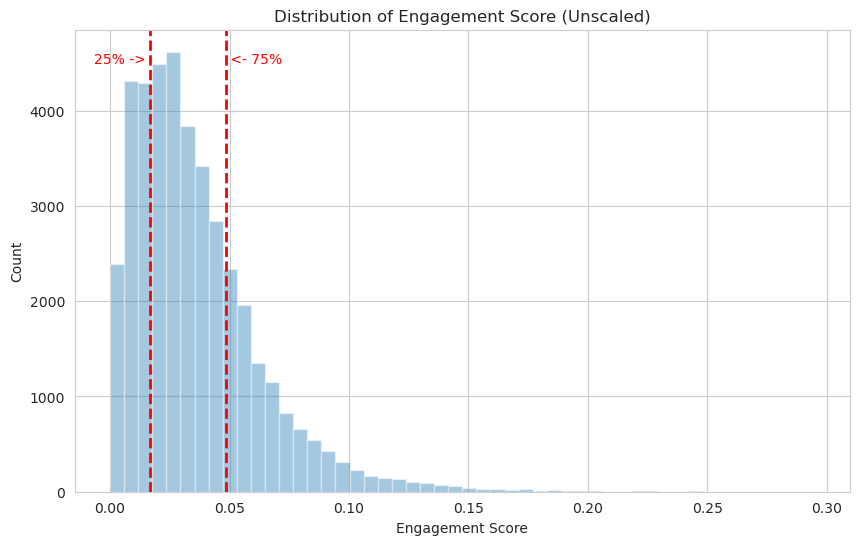

In [66]:
# plot the unscaled data
plt.figure(figsize=(10, 6))
sns.distplot(df['engagement_score'], kde=False)
plt.title('Distribution of Engagement Score (Unscaled)')
plt.xlabel('Engagement Score')
plt.ylabel('Count')
# add line at interquartile range
plt.axvline(df['engagement_score'].describe()['25%'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['engagement_score'].describe()['75%'], color='red', linestyle='dashed', linewidth=2)
# add text to indicate interquartile range
plt.text(df['engagement_score'].describe()['25%'], 4500, '25% -> ', color='red', ha='right')
plt.text(df['engagement_score'].describe()['75%'], 4500, ' <- 75%', color='red', ha='left')
plt.show()

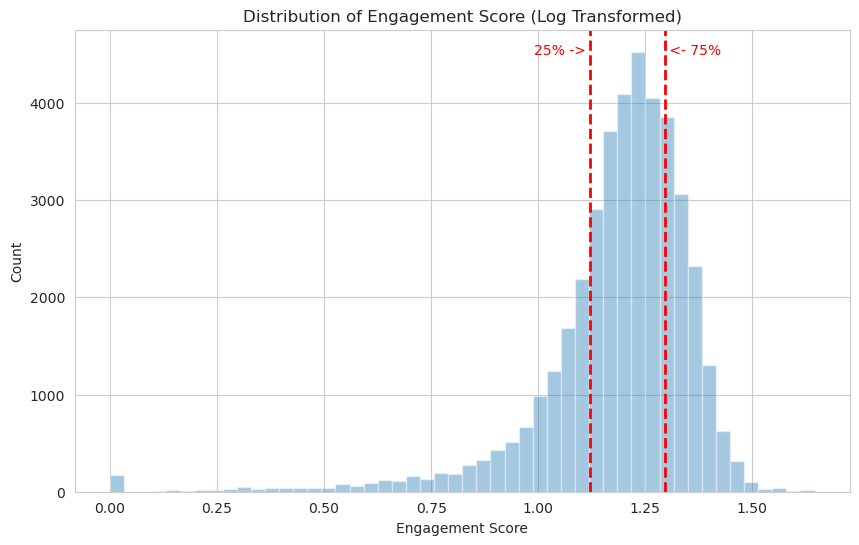

In [64]:
# plot the log-transformed data
plt.figure(figsize=(10, 6))
sns.distplot(df['engagement_score_log'], kde=False)
plt.title('Distribution of Engagement Score (Log Transformed)')
plt.xlabel('Engagement Score')
plt.ylabel('Count')
# add line at interquartile range
plt.axvline(df['engagement_score_log'].describe()['25%'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['engagement_score_log'].describe()['75%'], color='red', linestyle='dashed', linewidth=2)
# add text to indicate interquartile range
plt.text(df['engagement_score_log'].describe()['25%'], 4500, '25% -> ', color='red', ha='right')
plt.text(df['engagement_score_log'].describe()['75%'], 4500, ' <- 75%', color='red', ha='left')
plt.show()

It appears that the engagement score of the log-transformed data is much more normally distributed than the original data. Thus, we will use the log-transformed data to calculate our engagement score.

We will use the 75% interquartile range as the threshold to deem something popular or not. This means that if a video's engagement score is greater than the 75% interquartile range, then it is considered popular. Otherwise, it is not popular.

In [67]:
popularity_threshold = df['engagement_score_log'].describe()['75%']
print('Popularity Threshold:', popularity_threshold)

Popularity Threshold: 1.2950703729416098


Now that we have our threshold, we can create our target variable `is_popular`, where if a video's engagement score is greater than the 75% interquartile range, then it is considered popular (1). Otherwise, it is not popular (0).

In [68]:
# is popular 0 or 1
df['is_popular'] = df['engagement_score_log'].apply(lambda x: 1 if x >= popularity_threshold else 0)

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,likes_scaled,dislikes_scaled,log_views,log_likes,log_dislikes,engagement_score_log,engagement_score_scaled,engagement_score,is_popular
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.22,-0.07,-0.03,13.53,10.96,8.00,1.40,0.45,0.08,1
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John...",0.01,0.10,0.08,14.70,11.48,8.72,1.37,23.46,0.04,1
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.11,0.31,0.06,14.98,11.89,8.58,1.37,3.29,0.05,1
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...,-0.27,-0.28,-0.10,12.75,9.23,6.50,1.23,1.41,0.03,0
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...,-0.04,0.25,-0.06,14.56,11.79,7.60,1.33,-5.41,0.06,1


We have successfully created our target variable `is_popular`! Now we can move on to completing some more exploratory data analysis and feature engineering before building our mode.

## Feature Engineering & Exploratory Data Analysis: `publish_time`

Our `publish_time` column has a lot of important information we can extract. We can extract the `month`, `day_of_the_week`, and `hour` to see if there are any trends in the data between these variables and our target variable `is_popular`. For example, we can see if videos published on a certain day of the week are more popular than others, or if videos published at a certain time of the day are more popular than others.

In [70]:
# Break `publish_time` into `month`, `day_of_week`, and `hour` columns

# change publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

# create month column
df['month'] = df['publish_time'].dt.month

# create day of week column
df['day_of_week'] = df['publish_time'].dt.dayofweek

# create hour column
df['hour'] = df['publish_time'].dt.hour

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,...,log_views,log_likes,log_dislikes,engagement_score_log,engagement_score_scaled,engagement_score,is_popular,month,day_of_week,hour
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.22,...,13.53,10.96,8.00,1.40,0.45,0.08,1,11,0,17
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John...",0.01,...,14.70,11.48,8.72,1.37,23.46,0.04,1,11,0,7
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.11,...,14.98,11.89,8.58,1.37,3.29,0.05,1,11,6,19
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...,-0.27,...,12.75,9.23,6.50,1.23,1.41,0.03,0,11,0,11
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...,-0.04,...,14.56,11.79,7.60,1.33,-5.41,0.06,1,11,6,18


### Is there a certain publish month that shows a trend in popularity?

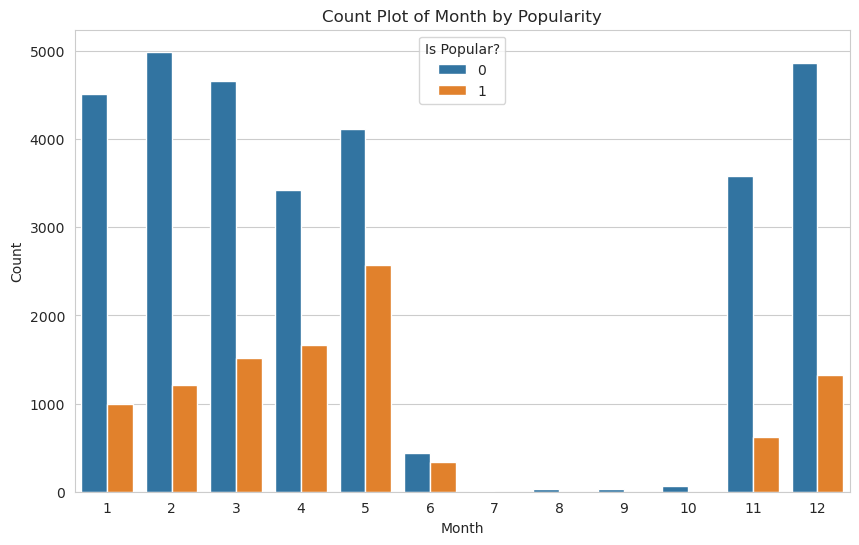

In [90]:
# count plot of `month` by `is_popular`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', hue='is_popular')
plt.title('Count Plot of Month by Popularity')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title="Is Popular?", loc='best')
plt.show()

From this plot, we can see that there are few videos in the summer / early fall in this dataset (July - October). This could be a result of when the data was collected. However, we can see that there is a slight trend in popularity between the months of the year. On average, it appears that early in the year (January, February, and March) have the most video uploaded. However, it appears that April and May have the highest count of popular videos.

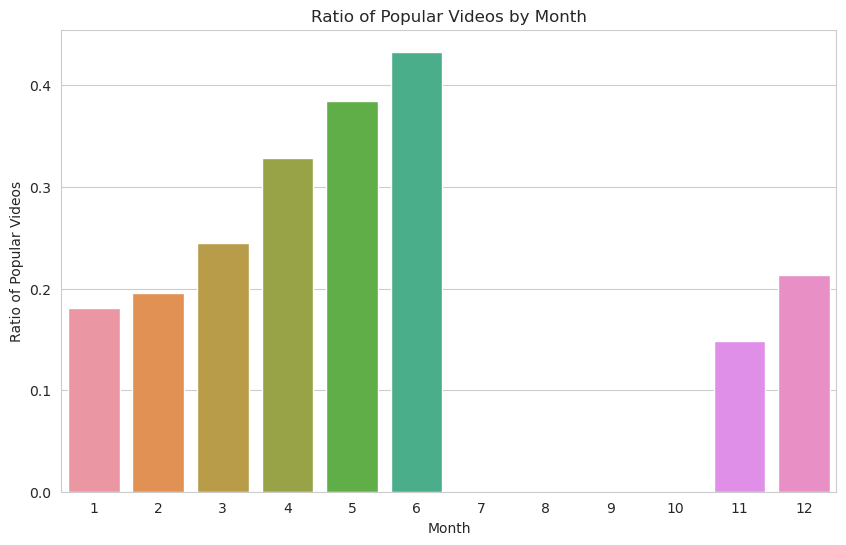

In [97]:
# calculate the ratio of popular videos by month
month_popularity_ratio = df.groupby('month')['is_popular'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_popularity_ratio.index, y=month_popularity_ratio.values)
plt.title('Ratio of Popular Videos by Month')
plt.xlabel('Month')
plt.ylabel('Ratio of Popular Videos')
plt.show()

Interestingly, early on in the year, (January, February, and March) have the most videos uploaded, however they have the lowest popularity. This may because in a New Year, individuals try to avoid their indulgences (such as watching YouTube videos), but then there is a spike in popularity of videos in the middle of the year. In June, there were a smaller count of videos uploaded however, the popularity of videos was the highest. This could be because of the start of summer and individuals have more free time to watch YouTube videos.

### Is there a certain publish day-of-the-week that shows a trend in popularity?

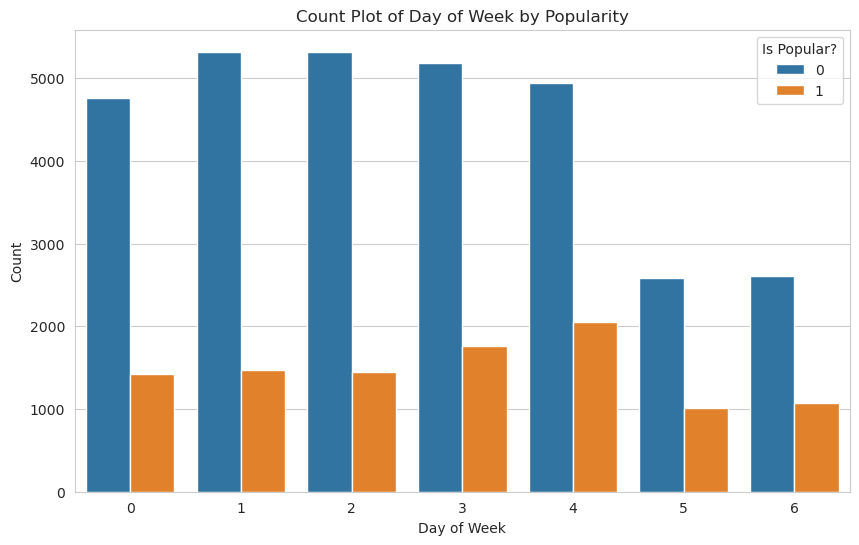

In [91]:
# count plot of `day_of_week` by `is_popular`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='is_popular')
plt.title('Count Plot of Day of Week by Popularity')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title="Is Popular?", loc='best')
plt.show()

It appears that most videos are posted on workdays (Monday - Friday), and less videos are posted on the weekends (Saturday - Sunday). 

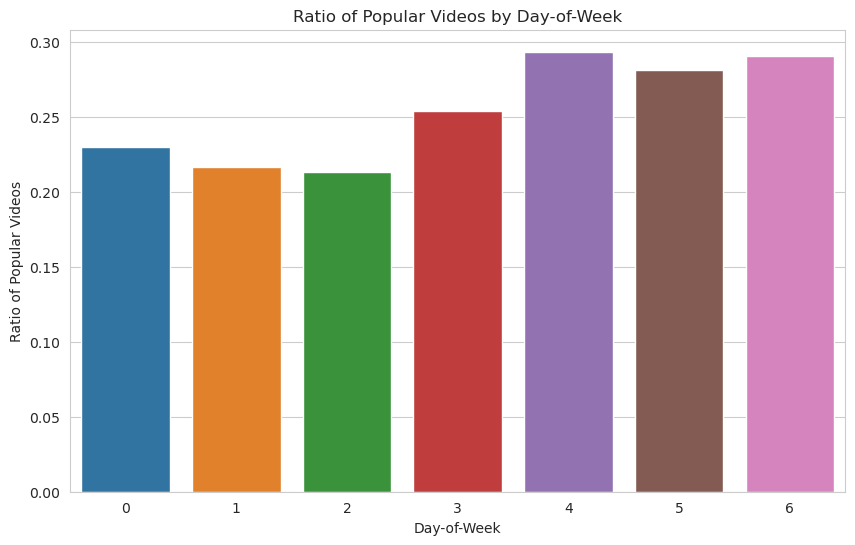

In [98]:
# calculate the ratio of popular videos by day-of-week
day_popularity_ratio = df.groupby('day_of_week')['is_popular'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_popularity_ratio.index, y=day_popularity_ratio.values)
plt.title('Ratio of Popular Videos by Day-of-Week')
plt.xlabel('Day-of-Week')
plt.ylabel('Ratio of Popular Videos')
plt.show()

There doesn't appear to be a trend in popularity between the days of the week. However, it appears that videos posted on the weekends are more likely to be popular than videos posted on workdays. This could be a result of people having more free time on the weekends to watch YouTube videos.

### Is there a certain publish hour of the day that shows a trend in popularity?

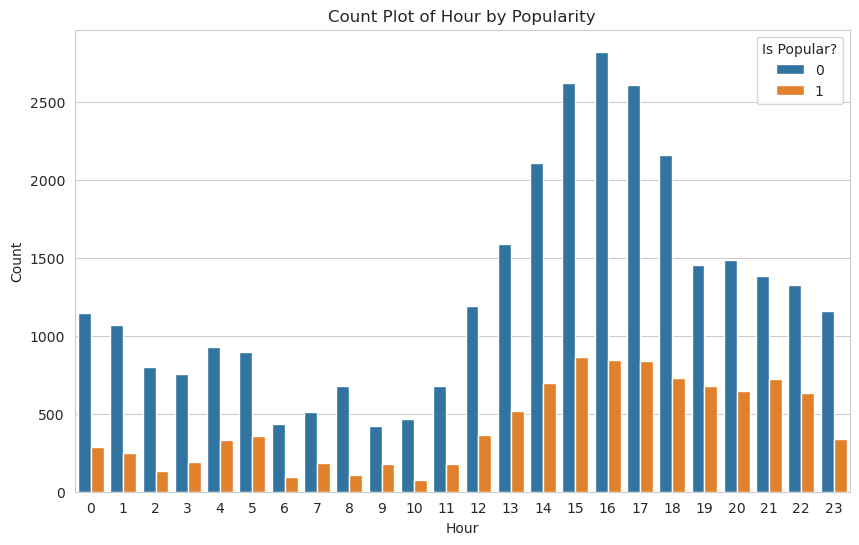

In [92]:
# count plot of `hour` by `is_popular`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', hue='is_popular')
plt.title('Count Plot of Hour by Popularity')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title="Is Popular?", loc='best')
plt.show()

It appears that most videos are posted between 1pm - 6pm, and less videos are posted between 6am - 10am. You can also see a decent number of videos posted at 12am - 1am-- this could because channel owners have an automatic upload schedule for their videos. It's a little hard to tell if there is a trend in popularity between the hours of the day, so we can create a hour popularity ratio to see if there is a trend.

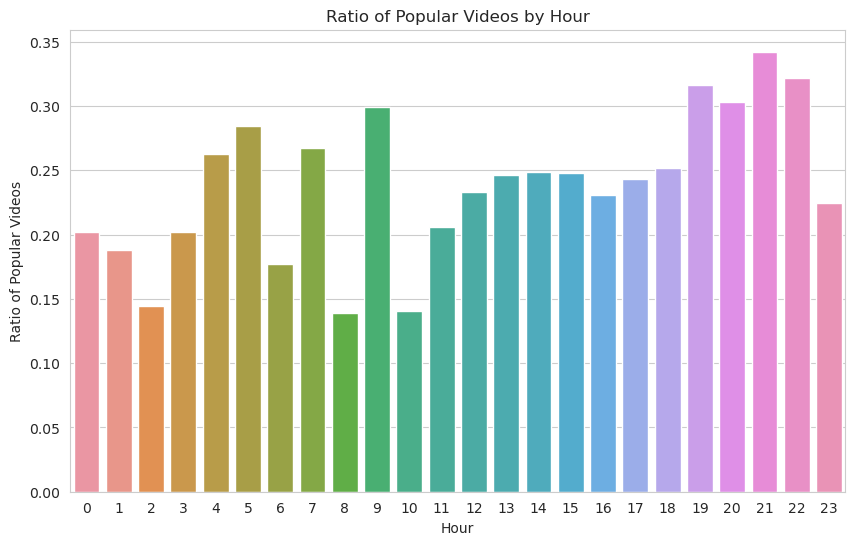

In [95]:
# calculate the ratio of popular videos by hour
hour_popularity_ratio = df.groupby('hour')['is_popular'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=hour_popularity_ratio.index, y=hour_popularity_ratio.values)
plt.title('Ratio of Popular Videos by Hour')
plt.xlabel('Hour')
plt.ylabel('Ratio of Popular Videos')
plt.show()

From the above barplot, we can see that the videos posted in the late evening (8pm - 11pm) are more likely to be popular. There is also a sweet spot at 9am where videos posted at this time are more likely to be popular.

## Feature Engineering & Exploratory Data Analysis: `category_id`

Our `category_id` column is an already imputed columns, so for exploratory data analysis, we will have to map the `category_id` to the actual category name. We can then see if there are any trends in popularity between the different categories.

In [102]:
# read in the category names
category_names = pd.read_json('US_category_id.json')

category_names.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


Our category names are in the `items` column dictionary, so we must extract the category name from the dictionary and map it to the `category_id`.

In [109]:
category_mapping = {}

for item in category_names['items']:
    category_id = int(item['id'])
    category_name = item['snippet']['title']
    category_mapping[category_id] = category_name

category_mapping

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [111]:
# map the category id to the category name
df['category_name'] = df['category_id'].map(category_mapping)
df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,...,log_likes,log_dislikes,engagement_score_log,engagement_score_scaled,engagement_score,is_popular,month,day_of_week,hour,category_name
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.22,...,10.96,8.00,1.40,0.45,0.08,1,11,0,17,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John...",0.01,...,11.48,8.72,1.37,23.46,0.04,1,11,0,7,Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.11,...,11.89,8.58,1.37,3.29,0.05,1,11,6,19,Comedy
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...,-0.27,...,9.23,6.50,1.23,1.41,0.03,0,11,0,11,Entertainment
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...,-0.04,...,11.79,7.60,1.33,-5.41,0.06,1,11,6,18,Entertainment


### Is there a certain category that shows a trend in popularity?

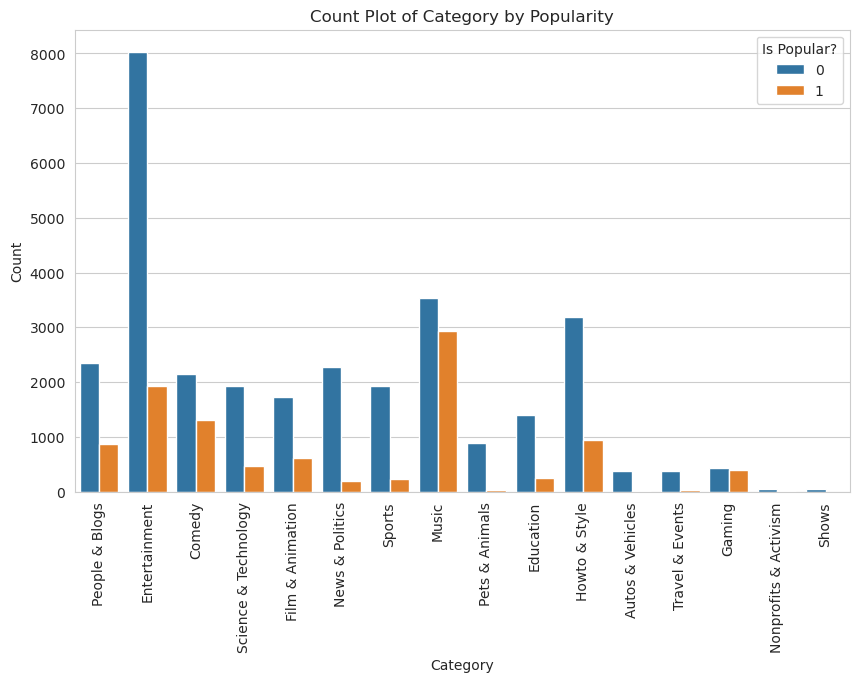

In [113]:
# count plot of `category_name` by `is_popular`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category_name', hue='is_popular')
plt.title('Count Plot of Category by Popularity')
plt.xlabel('Category')
# rotate x-axis labels
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title="Is Popular?", loc='best')

It appears that most videos uploaded fall into the `Entertainment` category, and the least videos uploaded fall into the `Nonprofits & Activism` and `Shows` category.

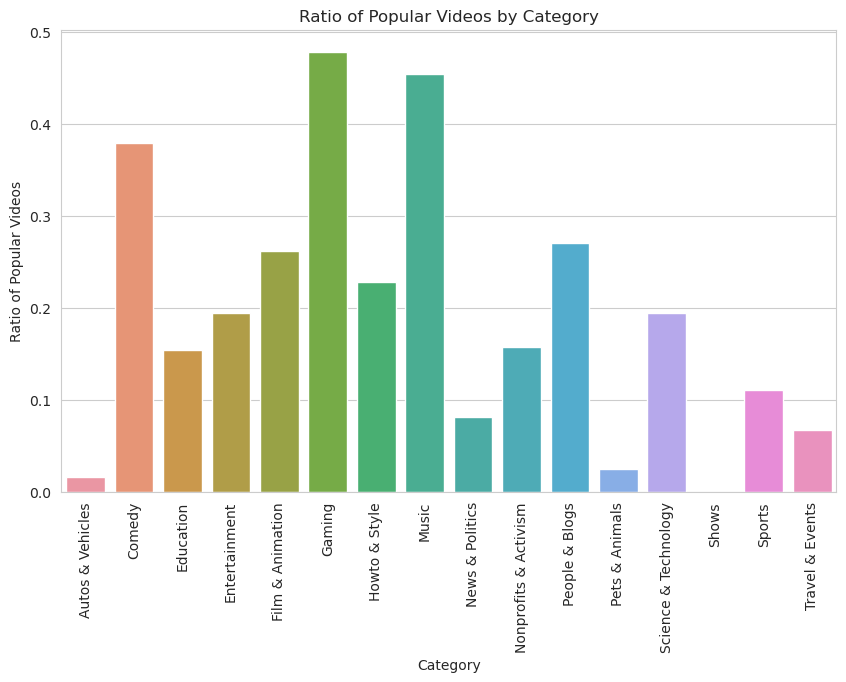

In [114]:
# calculate the ratio of popular videos by category
category_popularity_ratio = df.groupby('category_name')['is_popular'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_popularity_ratio.index, y=category_popularity_ratio.values)
plt.title('Ratio of Popular Videos by Category')
plt.xlabel('Category')
# rotate x-axis labels
plt.xticks(rotation=90)
plt.ylabel('Ratio of Popular Videos')
plt.show()

Despite most videos being uploaded in the `Entertainment` category, it appears that the `Gaming` category has the highest popularity ratio. `Music` videos also appear to be quite popular and have a high number of videos uploaded.

## Feature Engineering & Exploratory Data Analysis: `title`, `description`, and `tags` Part I

Our `title`, `description`, and `tags` columns are all text columns, so we will have to do some text preprocessing before we can do any exploratory data analysis. We will be using the `nltk` library to help us with our text preprocessing.

First let's take a look at what our text columns look like...

In [116]:
df['title']

0                       WE WANT TO TALK ABOUT OUR MARRIAGE
1        The Trump Presidency: Last Week Tonight with J...
2        Racist Superman | Rudy Mancuso, King Bach & Le...
3                         Nickelback Lyrics: Real or Fake?
4                                 I Dare You: GOING BALD!?
                               ...                        
40944                         The Cat Who Caught the Laser
40945                           True Facts : Ant Mutualism
40946    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
40947                  How Black Panther Should Have Ended
40948    Official Call of Duty®: Black Ops 4 — Multipla...
Name: title, Length: 40949, dtype: object

In [117]:
df['description']

0        SHANTELL'S CHANNEL - https://www.youtube.com/s...
1        One year after the presidential election, John...
2        WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3        Today we find out if Link is a Nickelback amat...
4        I know it's been a while since we did this sho...
                               ...                        
40944       The Cat Who Caught the Laser - Aaron's Animals
40945                                                  NaN
40946    I had so much fun transforming Safiyas hair in...
40947    How Black Panther Should Have EndedWatch More ...
40948    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 40949, dtype: object

In [118]:
df['tags']

0                                          SHANtell martin
1        last week tonight trump presidency|"last week ...
2        racist superman|"rudy"|"mancuso"|"king"|"bach"...
3        rhett and link|"gmm"|"good mythical morning"|"...
4        ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
                               ...                        
40944    aarons animals|"aarons"|"animals"|"cat"|"cats"...
40945                                               [none]
40946    I gave safiya nygaard a perfect hair makeover ...
40947    Black Panther|"HISHE"|"Marvel"|"Infinity War"|...
40948        call of duty|"cod"|"activision"|"Black Ops 4"
Name: tags, Length: 40949, dtype: object

It appears that our `title` column is fairly clean, but our `description` and `tags` columns have a lot of HTML tags, special characters, and punctuation. For example, in our `tags` column we have a `|` to divide the tags, we will need to remove and replace these with spaces. To clean our text we will need to remove all of these special characters and punctuation, and then we will need to tokenize our text. Tokenization is the process of splitting a string of text into tokens. We will be using the `word_tokenize` function from the `nltk` library to tokenize our text.

In [123]:
# get the set of stopwords
stopwords_set = set(stopwords.words('english'))

# create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        # Replace | with space
        text = text.replace('|', ' ')
        # Remove special characters and emojis
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove stop words
        text = ' '.join(word for word in text.split() if word not in stopwords_set)
    else:
        text = ''
    return text

# Function to perform lemmatization on text
def lemmatize_text(text):
    if isinstance(text, str):
        # Tokenize the text
        tokens = nltk.word_tokenize(text)
        # Lemmatize each token
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        # Remove stopwords
        lemmatized_text = ' '.join(token for token in lemmatized_tokens if token not in stopwords_set)
    else:
        lemmatized_text = ''
    return lemmatized_text

In [124]:
# Clean the text in the 'title' column
df['title'] = df['title'].apply(clean_text)

df['title']

0                                       want talk marriage
1        trump presidency last week tonight john oliver...
2         racist superman rudy mancuso king bach lele pons
3                              nickelback lyrics real fake
4                                          dare going bald
                               ...                        
40944                                     cat caught laser
40945                             true facts ant mutualism
40946    gave safiya nygaard perfect hair makeover base...
40947                                  black panther ended
40948    official call duty black ops 4 multiplayer rev...
Name: title, Length: 40949, dtype: object

In [125]:
# Clean the text in the 'description' column
df['description'] = df['description'].apply(clean_text)

df['description']

0        shantells channel httpswwwyoutubecomshantellma...
1        one year presidential election john oliver dis...
2        watch previous video nnsubscribe httpswwwyoutu...
3        today find link nickelback amateur secret nick...
4        know since show back might best episode yetnle...
                               ...                        
40944                      cat caught laser aarons animals
40945                                                     
40946    much fun transforming safiyas hair video servi...
40947    black panther endedwatch hishes httpsbitlyhish...
40948    call duty black ops 4 multiplayer raises bar f...
Name: description, Length: 40949, dtype: object

In [126]:
# Clean the text in the 'tags' column
df['tags'] = df['tags'].apply(clean_text)

df['tags']

0                                          shantell martin
1        last week tonight trump presidency last week t...
2        racist superman rudy mancuso king bach racist ...
3        rhett link gmm good mythical morning rhett lin...
4        ryan higa higatv nigahiga dare idy rhpc dares ...
                               ...                        
40944    aarons animals aarons animals cat cats kitten ...
40945                                                 none
40946    gave safiya nygaard perfect hair makeover base...
40947    black panther hishe marvel infinity war ended ...
40948                 call duty cod activision black ops 4
Name: tags, Length: 40949, dtype: object

In [127]:
# Apply lemmatization to the 'title' column
df['title'] = df['title'].apply(lemmatize_text)

df['title']

0                                       want talk marriage
1        trump presidency last week tonight john oliver...
2         racist superman rudy mancuso king bach lele pons
3                               nickelback lyric real fake
4                                          dare going bald
                               ...                        
40944                                     cat caught laser
40945                              true fact ant mutualism
40946    gave safiya nygaard perfect hair makeover base...
40947                                  black panther ended
40948    official call duty black ops 4 multiplayer rev...
Name: title, Length: 40949, dtype: object

In [128]:
# Apply lemmatization to the 'description' column
df['description'] = df['description'].apply(lemmatize_text)

df['description']

0        shantells channel httpswwwyoutubecomshantellma...
1        one year presidential election john oliver dis...
2        watch previous video nnsubscribe httpswwwyoutu...
3        today find link nickelback amateur secret nick...
4        know since show back might best episode yetnle...
                               ...                        
40944                        cat caught laser aaron animal
40945                                                     
40946    much fun transforming safiyas hair video servi...
40947    black panther endedwatch hishes httpsbitlyhish...
40948    call duty black ops 4 multiplayer raise bar fa...
Name: description, Length: 40949, dtype: object

In [129]:
# Apply lemmatization to the 'tags' column
df['tags'] = df['tags'].apply(lemmatize_text)

df['tags']

0                                          shantell martin
1        last week tonight trump presidency last week t...
2        racist superman rudy mancuso king bach racist ...
3        rhett link gmm good mythical morning rhett lin...
4        ryan higa higatv nigahiga dare idy rhpc dare t...
                               ...                        
40944    aaron animal aaron animal cat cat kitten kitte...
40945                                                 none
40946    gave safiya nygaard perfect hair makeover base...
40947    black panther hishe marvel infinity war ended ...
40948                 call duty cod activision black ops 4
Name: tags, Length: 40949, dtype: object

Now that we have tokenized and cleaned our text, we can do some exploratory data analysis on our text columns. Let's take a look at what words are most common in our `title`, `description`, and `tags` columns.

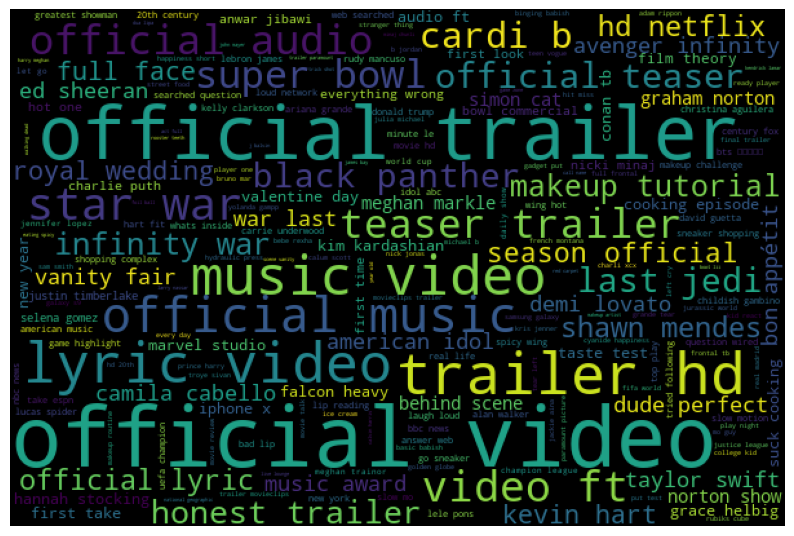

In [131]:
# create a word cloud for the 'title' column
title_wordcloud = WordCloud(width=600, height=400).generate(' '.join(df['title']))

plt.figure(figsize=(10, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

For the `title` column, words that follow the word **official** are the most common. Other words related to music are quite popular like **lyric**, **music**, and a plethora of artists. This lines up with our previous analysis of music videos being quite popular.

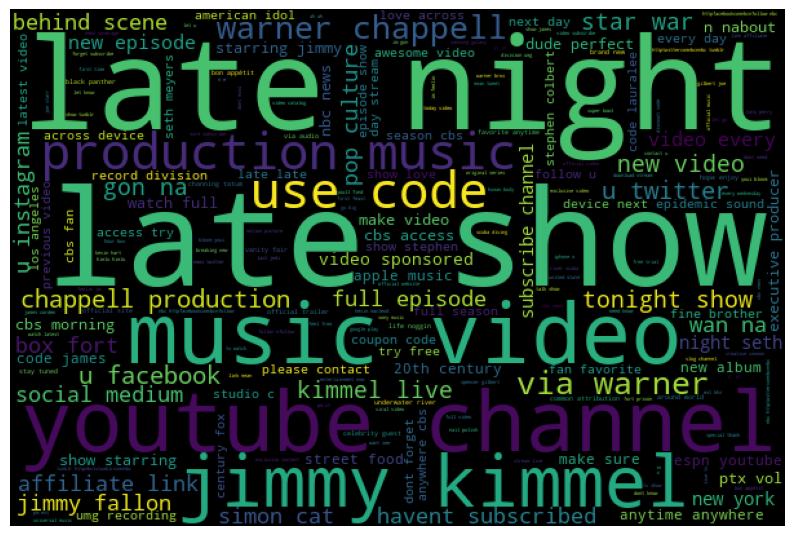

In [132]:
# create a word cloud for the 'description' column
description_wordcloud = WordCloud(width=600, height=400).generate(' '.join(df['description']))

plt.figure(figsize=(10, 8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

For the `description` column, words related to **late** are quite popular-- it seems like there was a trend with the Jimmy Kimmel late night show that was quite popular. Other words related to music are also quite popular like **music**, **production**, and **pop culture**. 

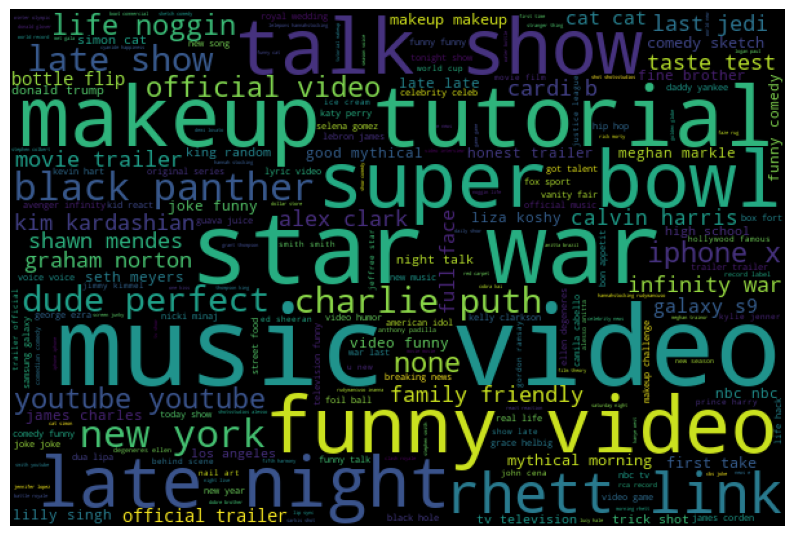

In [133]:
# create a word cloud for the 'tags' column
tags_wordcloud = WordCloud(width=600, height=400).generate(' '.join(df['tags']))

# display the generated wordcloud image
plt.figure(figsize=(10, 8))
plt.imshow(tags_wordcloud)
plt.axis('off')
plt.show()

The most common tags are **music video**, **star war**, and **makeup tutorial**. Blah blah...

## Feature Engineering & Exploratory Data Analysis: `title`, `description`, and `tags` Part II

Now that we have cleaned our text, we must do some feature engineering them so they can be usable for our model. We will use the `title`, `description`, and `tags` columns to feature engineer new columns like `title_length`, `description_length`, `tag_count`, `tag_length`, and `tag_popularity`.

In [134]:
# Create a new column `title_length` `description_length` `tags_length` with the length of each video's title, description and tags
df['title_length'] = df['title'].apply(lambda x: len(x))

df['description_length'] = df['description'].apply(lambda x: len(x))

df['tags_length'] = df['tags'].apply(lambda x: len(x))

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,...,engagement_score_scaled,engagement_score,is_popular,month,day_of_week,hour,category_name,title_length,description_length,tags_length
0,want talk marriage,CaseyNeistat,22,2017-11-13 17:13:01+00:00,shantell martin,748374,57527,2966,shantells channel httpswwwyoutubecomshantellma...,-0.22,...,0.45,0.08,1,11,0,17,People & Blogs,18,1060,15
1,trump presidency last week tonight john oliver...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,last week tonight trump presidency last week t...,2418783,97185,6146,one year presidential election john oliver dis...,0.01,...,23.46,0.04,1,11,0,7,Entertainment,50,457,96
2,racist superman rudy mancuso king bach lele pons,Rudy Mancuso,23,2017-11-12 19:05:24+00:00,racist superman rudy mancuso king bach racist ...,3191434,146033,5339,watch previous video nnsubscribe httpswwwyoutu...,0.11,...,3.29,0.05,1,11,6,19,Comedy,48,890,261
3,nickelback lyric real fake,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,rhett link gmm good mythical morning rhett lin...,343168,10172,666,today find link nickelback amateur secret nick...,-0.27,...,1.41,0.03,0,11,0,11,Entertainment,26,1106,399
4,dare going bald,nigahiga,24,2017-11-12 18:01:41+00:00,ryan higa higatv nigahiga dare idy rhpc dare t...,2095731,132235,1989,know since show back might best episode yetnle...,-0.04,...,-5.41,0.06,1,11,6,18,Entertainment,15,464,83


### ADD SOME VISUALIZATIONS HERE for length and such

We want to understand what words are most common in the most popular videos. To do so, let's get the top 100 most popular words in the `title`, `description`, and `tags` columns.

In [123]:
## REMOVE?
# create new `text` column with combined text from `title`, `description`, and `tags`

#df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['tags']

#df.head()

,title,channel_title,category_id,publish_time,tags,description,is_popular,month,day_of_week,hour,title_length,description_length,tags_length,text
0,want talk marriage,CaseyNeistat,22,2017-11-13 17:13:01+00:00,shantell martin,shantells channel httpswwwyoutubecomshantellma...,1,11,0,17,18,1060,15,want talk marriage shantells channel httpswwwy...
1,trump presidency last week tonight john oliver...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,last week tonight trump presidency last week t...,one year presidential election john oliver dis...,0,11,0,7,50,457,96,trump presidency last week tonight john oliver...
2,racist superman rudy mancuso king bach lele pons,Rudy Mancuso,23,2017-11-12 19:05:24+00:00,racist superman rudy mancuso king bach racist ...,watch previous video ▶ nnsubscribe ► httpswwwy...,0,11,6,19,48,894,261,racist superman rudy mancuso king bach lele po...
3,nickelback lyric real fake,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,rhett link gmm good mythical morning rhett lin...,today find link nickelback amateur secret nick...,0,11,0,11,26,1110,399,nickelback lyric real fake today find link nic...
4,dare going bald,nigahiga,24,2017-11-12 18:01:41+00:00,ryan higa higatv nigahiga dare idy rhpc dare t...,know since show back might best episode yetnle...,1,11,6,18,15,464,83,dare going bald know since show back might bes...


### clean by doing more of the below in functions.

In [138]:
# generator function that will yield the top 100 words based on their counts
def top_words_generator(word_counts):
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    for word, count in sorted_words[:top_word_count]:
        yield word

In [139]:
top_word_count = 100 # adjust to figure out what is a reasonable number of words analyze

#combined_text = ' '.join(df[df['is_popular'] == 1]['text'])  
title_text = ' '.join(df[df['is_popular'] == 1]['title'])
description_text = ' '.join(df[df['is_popular'] == 1]['description'])
tags_text = ' '.join(df[df['is_popular'] == 1]['tags'])

# split text into individual words
title_words = title_text.split()
description_words = description_text.split()
tags_words = tags_text.split()

# create a counter of the words
#words_counter = Counter(words)
title_counter = Counter(title_words)
description_counter = Counter(description_words)
tags_counter = Counter(tags_words)

In [140]:
# create generator object using the generator function
#top_words_gen = top_words_generator(words_counter)
top_words_title_gen = top_words_generator(title_counter)
top_words_description_gen = top_words_generator(description_counter)
top_words_tags_gen = top_words_generator(tags_counter)

# iterate through the generator to get the top 1000 words
#top_words = [word for word in top_words_gen]
top_words_title = [word for word in top_words_title_gen]
top_words_description = [word for word in top_words_description_gen]
top_words_tags = [word for word in top_words_tags_gen]

print("The top 10 words in the titles of popular videos are: \n{}".format(top_words_title[:10]))
print("\nThe top 10 words in the descriptions of popular videos are: \n{}".format(top_words_description[:10]))
print("\nThe top 10 words in the tags of popular videos are: \n{}".format(top_words_tags[:10]))

The top 10 words in the titles of popular videos are: 
['official', 'video', 'ft', 'trailer', 'music', 'makeup', '2017', 'v', '2018', 'challenge']

The top 10 words in the descriptions of popular videos are: 
['video', 'music', 'new', 'u', 'channel', 'get', 'im', 'like', 'make', 'n']

The top 10 words in the tags of popular videos are: 
['video', 'makeup', 'music', 'new', 'funny', 'challenge', 'movie', 'official', '2018', 'youtube']


Many of the words that were frequently used in videos are among the words in the most popular words. We can iterate ove the rows of the dataframe and count the occurences of the top words for `title`, `description`, and `tags` columns. We can then create new columns for each of the top words and add the count of the top words to the new columns.

In [142]:
def getWordCount(popular_words, text):
    count = 0
    for word in text.split():
        if word in popular_words:
            count += 1
    return count

In [143]:
# create new column of popular_title_words_count
df['popular_title_words_count'] = df['title'].apply(lambda x: getWordCount(top_words_title, x))

# create new column of popular_description_words_count
df['popular_description_words_count'] = df['description'].apply(lambda x: getWordCount(top_words_description, x))

# create new column of popular_tags_words_count
df['popular_tags_words_count'] = df['tags'].apply(lambda x: getWordCount(top_words_tags, x))

In [144]:
df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,...,month,day_of_week,hour,category_name,title_length,description_length,tags_length,popular_title_words_count,popular_description_words_count,popular_tags_words_count
0,want talk marriage,CaseyNeistat,22,2017-11-13 17:13:01+00:00,shantell martin,748374,57527,2966,shantells channel httpswwwyoutubecomshantellma...,-0.22,...,11,0,17,People & Blogs,18,1060,15,0,8,0
1,trump presidency last week tonight john oliver...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,last week tonight trump presidency last week t...,2418783,97185,6146,one year presidential election john oliver dis...,0.01,...,11,0,7,Entertainment,50,457,96,3,8,0
2,racist superman rudy mancuso king bach lele pons,Rudy Mancuso,23,2017-11-12 19:05:24+00:00,racist superman rudy mancuso king bach racist ...,3191434,146033,5339,watch previous video nnsubscribe httpswwwyoutu...,0.11,...,11,6,19,Comedy,48,890,261,4,7,8
3,nickelback lyric real fake,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,rhett link gmm good mythical morning rhett lin...,343168,10172,666,today find link nickelback amateur secret nick...,-0.27,...,11,0,11,Entertainment,26,1106,399,2,18,12
4,dare going bald,nigahiga,24,2017-11-12 18:01:41+00:00,ryan higa higatv nigahiga dare idy rhpc dare t...,2095731,132235,1989,know since show back might best episode yetnle...,-0.04,...,11,6,18,Entertainment,15,464,83,0,11,2


In [141]:
word_counts_df = pd.DataFrame(0, index= df.index, columns=top_words_title)

#iterate over the rows of the dataframe and count the occurrences of the top words
for i, row in df.iterrows():
    text = row['text']
    words = text.split()
    word_counts = Counter(words)
    for word, count in word_counts.items():
        if word in top_words:
            word_counts_df.loc[i, word] = count

word_counts_df.head()

KeyError: 'text'

In [126]:
col_to_drop = ['title', 'description', 'tags', 'publish_time', 'text', 'channel_title']

df.drop(col_to_drop, axis=1, inplace=True)

df.head()

,category_id,is_popular,month,day_of_week,hour,title_length,description_length,tags_length
0,22,1,11,0,17,18,1060,15
1,24,0,11,0,7,50,457,96
2,23,0,11,6,19,48,894,261
3,24,0,11,0,11,26,1110,399
4,24,1,11,6,18,15,464,83


In [127]:
df = pd.concat([df, word_counts_df], axis=1)

df.head()

,category_id,is_popular,month,day_of_week,hour,title_length,description_length,tags_length,video,’,...,guy,play,much,x,back,friend,fashion,c,star,thank
0,22,1,11,0,17,18,1060,15,2,0,...,0,0,0,0,0,0,0,0,0,0
1,24,0,11,0,7,50,457,96,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,11,6,19,48,894,261,2,0,...,0,0,0,1,0,0,0,0,0,0
3,24,0,11,0,11,26,1110,399,1,1,...,0,0,0,0,0,0,0,0,0,0
4,24,1,11,6,18,15,464,83,0,0,...,0,0,0,0,1,0,0,0,0,0


## Prepare for Modeling

In [ ]:
# remove the columns that are no longer needed
columns_to_drop = ['views', 'likes', 'dislikes', 'views_scaled', 'likes_scaled', 'dislikes_scaled', 'engagement_score', 'engagement_score_scaled']

df.drop(columns_to_drop, inplace=True, axis=1)

df.head()# remove the columns that are no longer needed
columns_to_drop = ['views', 'likes', 'dislikes', 'views_scaled', 'likes_scaled', 'dislikes_scaled', 'engagement_score', 'engagement_score_scaled']

df.drop(columns_to_drop, inplace=True, axis=1)

df.head()

Me just playing with the model... we need to clean up the text columns more maybe ?

In [128]:
# logisitic regression model
# split data into train and test sets

from sklearn.model_selection import train_test_split

X = df.drop('is_popular', axis=1)
y = df['is_popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32759, 107), (8190, 107), (32759,), (8190,))

In [129]:
# instantiate logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# fit model to training data
lr.fit(X_train, y_train)

# make predictions on test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# on both training and testing sets
print('Training set scores:')
print('Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Precision: ', precision_score(y_train, y_train_pred))
print('Recall: ', recall_score(y_train, y_train_pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, y_train_pred))
print('Classification Report: \n', classification_report(y_train, y_train_pred))

print('Testing set scores:')
print('Accuracy: ', accuracy_score(y_test, y_test_pred))
print('Precision: ', precision_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training set scores:
Accuracy:  0.7753289172441161
Precision:  0.6408658576582487
Recall:  0.23774181773938435
Confusion Matrix: 
 [[23445  1095]
 [ 6265  1954]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.86     24540
           1       0.64      0.24      0.35      8219

    accuracy                           0.78     32759
   macro avg       0.71      0.60      0.61     32759
weighted avg       0.75      0.78      0.73     32759

Testing set scores:
Accuracy:  0.7714285714285715
Precision:  0.5948387096774194
Recall:  0.2283308568598316
Confusion Matrix: 
 [[5857  314]
 [1558  461]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.95      0.86      6171
           1       0.59      0.23      0.33      2019

    accuracy                           0.77      8190
   macro avg       0.69      0.59      0.60      8190
weighted avg       0.74      0.77

/home/sfirestone/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
